# Linear discriminant analysis
----


Logistic regression 방법은 $\mathbb P (Y=k | X=x)$의 확률을 계산하는 것이었다.

Linear distcriminant analysis에서는 주어진 $Y$에 대해 $X$의 분포를 추정한다.

만약 $X$의 분포가 정규분포라고 하면, 이 방법은 logistic regression과 매우 흡사하다.

다음의 상황에서 linear discriminant analysis가 유용하게 사용될 수 있다.

* 클래스들이 잘 분리되어 있을 때, logistic regression의 모수 추정은 불안정한 경우가 많다. 이 경우 LDA가 더 좋다.

* 데이터의 개수가 상대적으로 작고, $X$의 분포가 정규분포와 흡사할 때, LDA가 logistic regression 보다 잘 작동하는 경우가 많다.

* 2개가 넘는 클래스가 있을 때도, LDA는 자연스럽게 확장되어 사용 가능하다.

### Bayes 정리와 LDA 

LDA는 Bayes 정리를 기반으로 한다.

$Y$가 $K$개의 클래스를 가질 수 있다고 하자.

$\pi_k$를 임의로 선택한 관찰 결과가 $k$에 속하게 될, 사전 확률 (prior probability)이라고 하자.

* 즉, 이 확률은 $X$에 대한 정보 없이 결정된 확률이다.

$Y$가 $k$의 클래스에 속할 때, $X$의 확률밀도함수를 다음과 같이 정의하자.

$$ f_k(x) = \mathbb P (X=x | Y=k) $$

Bayes 정리에 따르면,

$$ \mathbb P(Y = k | X = x) = \frac{\pi_k f_k(x)}{\sum_{l=1}^{K} \pi_l f_l(x)} $$

한편, $p_k(x) = \mathbb P(Y = k | X = x)$라고 하겠다. 이를 사후 확률, posterior probability 라고도 한다.

이전에는 $p_k$를 직접 계산하는 것이 목표였다면, LDA에서는 $\pi$들과 $f$들을 추정하여, $p_k$를 추정한다.

  * 사전 확률 $\pi_k$: 클래스 비율로부터 간단히 추정 가능하다.
    
  * 클래스별 밀도 함수 $f_k(x)$: 일반적으로는 추정이 어렵지만, LDA에서는 각 클래스의 $X$가 정규분포를 따른다는 가정을 통해 간단하게 추정 가능하다


#### (참고) 일반적인 Bayes 정리 

서로 배반(disjoint)이며 전체 표본공간을 구성하는 사건 $A_1, A_2, \dots, A_K$가 있을 때, 즉

$$
\bigcup_{k=1}^{K} A_k = \Omega, \quad A_k \cap A_l = \emptyset \quad \text{for } k \neq l,
$$

임의의 사건 $B$에 대해 Bayes 정리는 다음과 같이 쓸 수 있다.

$$
\mathbb{P}(A_k \mid B) = \frac{\mathbb{P}(B \mid A_k)\mathbb{P}(A_k)}{\sum_{l=1}^{K} \mathbb{P}(B \mid A_l)\mathbb{P}(A_l)}
$$

여기서,

* 분모 $\mathbb{P}(B) = \sum_{l=1}^{K} \mathbb{P}(B \mid A_l)\mathbb{P}(A_l)$는 총확률의 법칙에 의해 도출된 것,
* 위 식은 분모를 명시적으로 확장하여, 다수의 가능한 원인(또는 클래스)에 대해 정규화된 형태로 나타낸 Bayes 정리의 확장된 표현

### Linear Discriminant Analysis when $p = 1$

$Y$가 $k$번째 클래스에 속할 때, $X$의 조건부 확률 밀도 함수 $f_k(x)$를 정규분포로 가정하자.

$$
f_k(x) = \frac{1}{\sqrt{2 \pi} \sigma_k} \exp\left( -\frac{1}{2} \left( \frac{x - \mu_k}{\sigma_k} \right)^2 \right)
$$

여기서 $\mu_k$는 클래스 $k$의 평균, $\sigma_k^2$는 분산이다.

LDA에서는 **클래스 간 분산이 동일**하다고 가정하여 $\sigma_k = \sigma$로 놓는다.


Bayes 정리에 따르면 사후 확률 $p_k(x) = \mathbb{P}(Y = k \mid X = x)$는 다음과 같이 주어진다.

$$
p_k(x) = \frac{\pi_k \cdot \frac{1}{\sqrt{2 \pi} \sigma} \exp\left( -\frac{1}{2} \left( \frac{x - \mu_k}{\sigma} \right)^2 \right)}{\sum_{l=1}^{K} \pi_l \cdot \frac{1}{\sqrt{2 \pi} \sigma} \exp\left( -\frac{1}{2} \left( \frac{x - \mu_l}{\sigma} \right)^2 \right)}
$$

분류 문제에서 관심 있는 것은 $x$에 대해 어떤 $p_k(x)$가 가장 큰가이다.

비교를 용이하게 하기 위해 **로그 변환**을 하고 상수항을 제거하여, 다음과 같은 **discriminant score** $\delta_k(x)$를 도출한다.

$$
\delta_k(x) = x \cdot \frac{\mu_k}{\sigma^2} - \frac{\mu_k^2}{2\sigma^2} + \log(\pi_k)
$$

이때,

* $p_k(x)$ 중에서 최대를 찾는 것과
* $\delta_k(x)$ 중에서 최대를 찾는 것은 **동치**이다.

따라서 분류는 $x$를 $\delta_k(x)$가 가장 큰 클래스 $k$에 할당하는 것으로 수행된다.

한편, $\delta_k(x)$는 $x$에 대한 **선형 함수**이므로, 이 모형이 "Linear" Discriminant Analysis라 불리는 이유다.

그리고, 확률 계산은 discriminant score에 softmamx 함수를 적용한 것과 동치이다.

즉,

$$ p_k (x) = \frac{\delta_k (x)}{\sum_{i=1}^K \delta_i (x)} $$


예를 들어, $K = 2$이고 사전 확률이 동일하게 $\pi_1 = \pi_2 = 0.5$일 경우, 결정 경계는 다음과 같이 단순해진다.

$$
x = \frac{\mu_1 + \mu_2}{2}
$$

이는 두 클래스 평균의 중간값이다.




#### 모수 추정

실제로는 모수들 $\pi_k, \mu_k, \sigma$를 알 수 없기 때문에, 주어진 학습 데이터를 바탕으로 다음과 같이 추정하여 사용한다:

$$
\begin{aligned}
\hat{\pi}_k &= \frac{n_k}{n}, \quad &\text{(클래스 비율)} \\
\hat{\mu}_k &= \frac{1}{n_k} \sum_{i: y_i = k} x_i, \quad &\text{(클래스 평균)} \\
\hat{\sigma}^2 &= \frac{1}{n - K} \sum_{k=1}^{K} \sum_{i: y_i = k} (x_i - \hat{\mu}_k)^2, \quad &\text{(공통 분산)}
\end{aligned}
$$

여기서,

* $n_k$: 클래스 $k$에 속한 샘플 수,
* $n$: 전체 샘플 수.

### Linear Discriminant Analysis when $p > 1$

LDA는 $p > 1$인 다변량 입력에 대해서도 확장할 수 있으며, 이때는 **다변량 정규분포**(multivariate normal distribution)를 이용한다.

다변량 정규분포의 확률밀도함수는 다음과 같다:

$$
f(x) = \frac{1}{(2\pi)^{p/2} |\Sigma|^{1/2}} \exp \left(-\frac{1}{2} (x - \mu)^{\top} \Sigma^{-1} (x - \mu) \right)
$$

여기서

* $\mu$는 $p$-차원 평균 벡터,
* $\Sigma$는 $p \times p$ 공분산 행렬,
* $|\Sigma|$는 행렬식(determinant)이다.

LDA에서는 클래스 $k$에 대응되는 $X$의 조건부 분포가 다음과 같이 가정된다:

$$
X \mid Y = k \enspace \sim \enspace  \mathcal{N}(\mu_k, \Sigma)
$$

* 즉, 각 클래스마다 **다른 평균 벡터** $\mu_k$를 가지지만,
* **공통의 공분산 행렬** $\Sigma$를 공유한다고 가정한다.

> 이 가정은 LDA의 핵심이며, 이를 통해 결정 경계가 선형이 되도록 유도된다.

이 가정과 Bayes 정리를 바탕으로 도출되는 **discriminant score**는 다음과 같다:

$$
\delta_k(x) = x^{\top} \Sigma^{-1} \mu_k - \frac{1}{2} \mu_k^{\top} \Sigma^{-1} \mu_k + \log \pi_k
$$

* 첫 항: $x$에 대해 **선형**임
* 둘째 항: $x$와 무관한 상수
* 셋째 항: 사전확률 기반 상수

따라서 $\delta_k(x)$는 $x$에 대한 **선형 함수**이며,
$x$가 주어졌을 때 $\delta_k(x)$가 가장 큰 클래스를 선택하게 된다.


#### 예시

아래 그림은 $\pi_1 = \pi_2 = \pi_3 = \frac{1}{3}$일 때의 LDA 분류 경계선 예시이다:

* **점선**: 실제 데이터 생성 분포를 알고 있다고 가정할 때의 **Bayes optimal decision boundary**
* **실선**: LDA의 가정(정규분포 + 동일 공분산 행렬)에 따라 학습된 **LDA decision boundary**

실제 분포와 근사된 LDA 경계가 얼마나 유사한지를 시각적으로 비교할 수 있다.

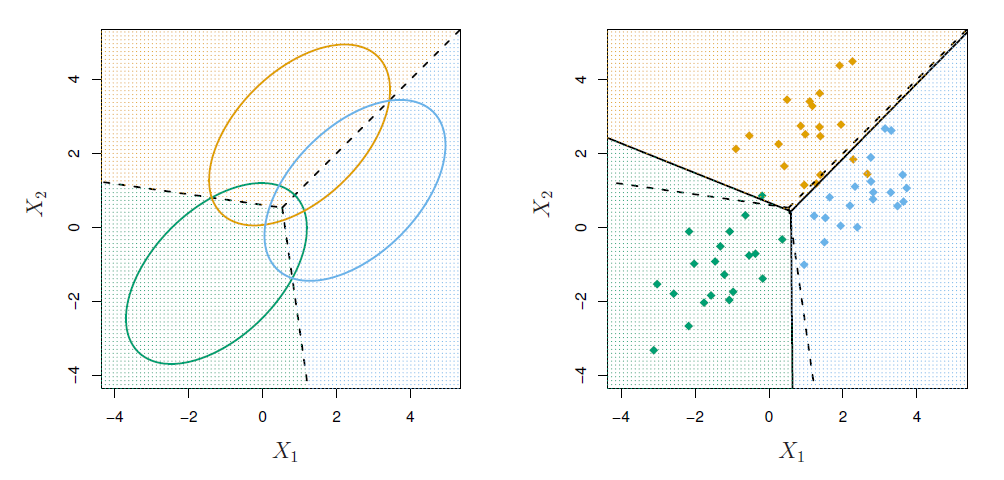

데이터로부터 $\hat \delta_k (x)$가 추정되면, 소프트맥스 함수를 이용해 각 클래스에 대한 확률 추정에 사용할 수 있다.

$$ \hat{\mathbb P} (Y=k | X=x) = \frac{e^{\hat \delta_k (x)}}{\sum_{l = 1}^{K} e^{\hat \delta_{l}(x)}} $$

### [Wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html)을 이용한 예제

In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np
raw_wine = datasets.load_wine()

In [2]:
raw_wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
raw_wine["feature_names"]

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
pd.DataFrame(raw_wine["data"], columns = raw_wine["feature_names"])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


alcohol과 malic_acid를 이용하여 와인의 종류를 예측하는 예제를 진행해 보자.

In [5]:
X, y  = raw_wine.data[:,:2], raw_wine.target

In [6]:
pd.DataFrame(np.c_[X, y],  columns = ["alcohol", "malic_acid", "y"])

,alcohol,malic_acid,y
0,14.23,1.71,0.0
1,13.20,1.78,0.0
2,13.16,2.36,0.0
3,14.37,1.95,0.0
4,13.24,2.59,0.0
...,...,...,...
173,13.71,5.65,2.0
174,13.40,3.91,2.0
175,13.27,4.28,2.0
176,13.17,2.59,2.0


Logistic regression 예제에서는 데이터의 전부를 모형 훈련에 사용하였지만, 이 예제에서는 훈련 데이터와 테스트 데이터를 분할하여 사용하여 보자.  

[```sklearn.model_selection.train_test_split```](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)을 이용하면, 데이터를 쉽게 분할할 수 있다.

- 기본 설정으로 75:25로 train/data set을 나눈다.  
- `test_size` 매개변수를 설정하여 비율 조절 가능. 

In [7]:
# 트레이닝 테스트 데이터 분할
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y)

In [8]:
pd.DataFrame(np.c_[X_tn, y_tn],  columns = ["alcohol", "malic_acid", "y"])

,alcohol,malic_acid,y
0,14.16,2.51,2.0
1,13.78,2.76,2.0
2,13.24,2.59,0.0
3,12.25,3.88,2.0
4,13.73,1.50,0.0
...,...,...,...
128,11.84,0.89,1.0
129,13.82,1.75,0.0
130,13.05,1.73,0.0
131,13.62,4.95,2.0


In [9]:
pd.DataFrame(np.c_[X_te, y_te],  columns = ["alcohol", "malic_acid", "y"])

,alcohol,malic_acid,y
0,12.37,1.17,1.0
1,12.77,2.39,2.0
2,11.46,3.74,1.0
3,13.05,3.86,1.0
4,12.72,1.81,1.0
5,13.49,1.66,1.0
6,12.93,2.81,2.0
7,11.87,4.31,1.0
8,11.81,2.12,1.0
9,13.16,3.57,2.0


### [```sklearn.discriminant_analysis.LinearDiscriminantAnalysis```](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

훈련 데이터만을 이용하여 ```fit```을 진행한다.

In [11]:
lda.fit(X_tn, y_tn)

LinearDiscriminantAnalysis()

앞 단원에서 했던 것처럼 meshigrid를 생성하여 gird의 모든 point에 대해 예측을 진행한다.

In [12]:
xx1, xx2 = np.meshgrid(np.linspace(11, 15, 1000),
                         np.linspace(0, 6, 1000))


pd.DataFrame(xx1)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
1,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
2,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
3,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
4,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
996,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
997,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0
998,11.0,11.004004,11.008008,11.012012,11.016016,11.02002,11.024024,11.028028,11.032032,11.036036,...,14.963964,14.967968,14.971972,14.975976,14.97998,14.983984,14.987988,14.991992,14.995996,15.0


In [13]:
np.c_[xx1.ravel(), xx2.ravel()]

array([[11.        ,  0.        ],
       [11.004004  ,  0.        ],
       [11.00800801,  0.        ],
       ...,
       [14.99199199,  6.        ],
       [14.995996  ,  6.        ],
       [15.        ,  6.        ]])

In [14]:
# xx1과 xx2의 값을 이용하여 세 개의 class에 대해 각 class 별 확률 예측
Z = lda.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])   # ravel : Return a contiguous flattened array
Z

array([[9.43346880e-06, 9.99974349e-01, 1.62177318e-05],
       [9.65115153e-06, 9.99973892e-01, 1.64565815e-05],
       [9.87385734e-06, 9.99973427e-01, 1.66989488e-05],
       ...,
       [9.98361296e-02, 1.25988258e-06, 9.00162611e-01],
       [1.00574851e-01, 1.24057727e-06, 8.99423908e-01],
       [1.01318424e-01, 1.22156036e-06, 8.98680354e-01]])

아래 방법에서는 각 행 별로 확률의 값을 최대화 하는 열의 index를 찾는다.  
그 index는 곧 class를 의미한다.

In [15]:
np.argmax(Z, axis=1)

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [16]:
clss = np.argmax(Z, axis=1).reshape(xx1.shape)
clss

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]], dtype=int64)

물론 ```predict```로 찾는 것과 동일하다.

In [17]:
clss = lda.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
clss

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

```pcolormesh```를 통해 LDA의 경계선을 표현해 보자.  
산점도는 train data를 의미한다.

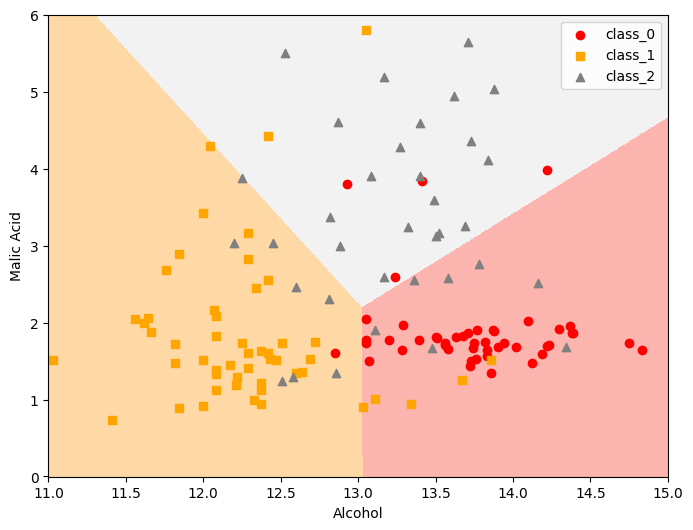

In [18]:
import matplotlib.pyplot as plt
#from matplotlib import colors

plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
    
plt.legend()    
plt.show()

아래는 산점도만 test set으로 바꾸었다.

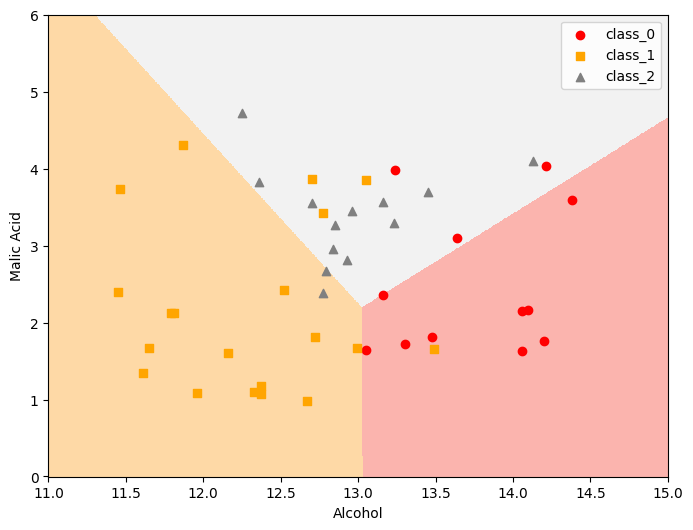

In [19]:
# Using test set
plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_te, columns = raw_wine["feature_names"][:2])
df['target'] = y_te
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]


for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
plt.legend()    
plt.show()

한편, `.decision_function`을 이용하면 discriminant score를 계산해 볼 수 있다.

내부적으로는 discriminant score를 계산한 후, softmax를 이용해 각 클래스에 속할 확률을 계산한다.

In [20]:
lda.decision_function(X_te[:5, :])

array([[-3.45449937,  0.29011092, -3.79996828],
       [-2.88265456, -1.43872061, -2.04871965],
       [-7.02284766,  1.86126544, -1.29758287],
       [-2.74365199, -2.92108551, -0.07536282],
       [-2.77280244, -1.03372355, -2.78637393]])

모형 추정치들을 직접 확인하려면 다음을 활용한다.

In [21]:
# 각 클래스에 대한 평균 벡터
lda.means_

array([[13.74595745,  1.88680851],
       [12.2754902 ,  1.83823529],
       [13.22742857,  3.30571429]])

In [22]:
# 각 클래스에 속할 사전 확률 = 클래스 비율
lda.priors_

array([0.35338346, 0.38345865, 0.26315789])

공분산 행렬의 추정치는 `solver='lsqr'` 혹은 `solver='eigen'`으로 생성했을 때 가능하다.

In [23]:
LinearDiscriminantAnalysis(solver='lsqr', store_covariance=True).fit(X_tn, y_tn).covariance_

array([[0.25223957, 0.00568197],
       [0.00568197, 0.85400165]])

## Confusion matrix

먼저 이진 분류(binary classification) 문제를 전제로 하며, 두 가지 클래스(Positive / Negative) 간 구분에 초점을 맞추어 살펴 보자.

- Positive / Negative는 의료 진단 예시에서 유래한 용어

(다중 클래스(multi-class) 분류 문제에서는 각 클래스마다 아래에서 나오는 지표들과 유사한 값들을 one-vs-rest 방식으로 정의하여 계산)

|            |          | True  status   |                |
|------------|----------|----------------|----------------|
|            |          | Positive (non-null)       | Negative (null)      |
| Prediction | Positive (non-null) | True Positive  | False Positive |
|            | Negative (null) | False Negative | True Negative  |
|            |          |                |                |


### Types of errors

* False positive rate : 실제 negative 중 positive로 잘못 예상된 False positive에 해당하는 비율, FP/N
    * 통계학에서의 1종 오류율, $\alpha$, 귀무가설(null)이 사실이어도 기각될 확률
    * 1 - specificity <br><br>
    
* False negative rate : 실제 positive 중 negative로 잘못 예상된 False negative에 해당하는 비율, TP/P
    * 통계학에서의 2종 오류율, $\beta$,  귀무가설(null)이 거짓이어도 기각하지 못할 확률
    * 1 - sensitivity <br><br>


### 주요 성능 지표들

* 민감도, Sensitivity, **재현율, Recall** (True positive rate), Power : 실제 postive 중 올바르게 positive로 예측된 비율, TP/P
  * 1 - FNR 
  * 기계학습에서는 예측하고자 하는 클래스를 얼마나 잘 찾아냈는지를 나타내는 비율 
  * 실제 스팸 이메일 100개 중 90개를 모델이 스팸으로 맞췄다면 → 민감도 90% <br><br>
  
* 특이도, Specificity (True negative rate) : 실제 negative 중 올바르게 negative로 예측된 비율, TN/N
  * 1 - FPR <br><br>
  
* **정밀도, Precision** (Positive predictive rate) : 양성 예측 중 실제 양성의 비율, TP / P*
  * 기계학습에서는 모델이 예측한 클래스 중 올바르게 예측한 비율 
  * 모델이 스팸이라고 예측한 50개의 메일 중 45개가 진짜 스팸이었다면 → 정밀도 90% <br><br>

* Negative predictive rate : 음성 예측 중 실제 음성의 비율, TN / N*

* **정확도, Accuracy** : 전체 데이터 중 정답으로 분류되는 비율

* **에러율, Error rate** : 전체 데이터 중 오답으로 분류되는 비율

### Precision–Recall Trade-off

정밀도 (precision)와 민감도 (sensitivity)은 트레이드오프를 지닌다. 

정밀도를 올리면 민감도 (재현율)이 줄고, 민감도를 높이면 정밀도가 낮아지는 경향이 있다.

양성으로 판정되는 기준을 높이면 정밀도가 올라가나, 민감도 (재현율)은 떨어진다.

양성으로 판정되는 기준을 낮추면 재현율은 올라가나, 정밀도는 떨어진다.

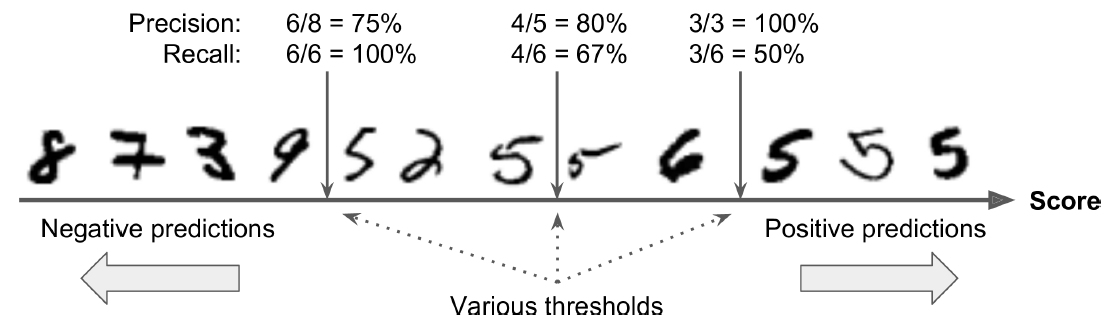

### ROC (receiver operating characteristic) curve

Classification threshold 에 따라 x-축에 FPR (False positive rate, 1 - specificity)을 놓고, y-축에 TPR (True positive rate, 민감도, 재현율)의 값을 놓고 비교하는 것

* $\mathbb P(Y = 1 | X = x) > \text{threshold}  \Rightarrow \hat Y =1 $

* FPR이 낮을수록, TPR이 높을수록 좋다.

(통계학적 용어로는 제1종 오류율과 검정력의 비교)

모형마다 ROC가 다르며, ROC 아래의 면적 (AUC)이 클 수록 좋은 분류기라고 할 수 있다.

한편, 아래 ROC 곡선에서 FPR은 낮으면서, 재현율은 높은 지점에 해당하는 적절한 threshold를 선택하는 것이 중요할 것이다.

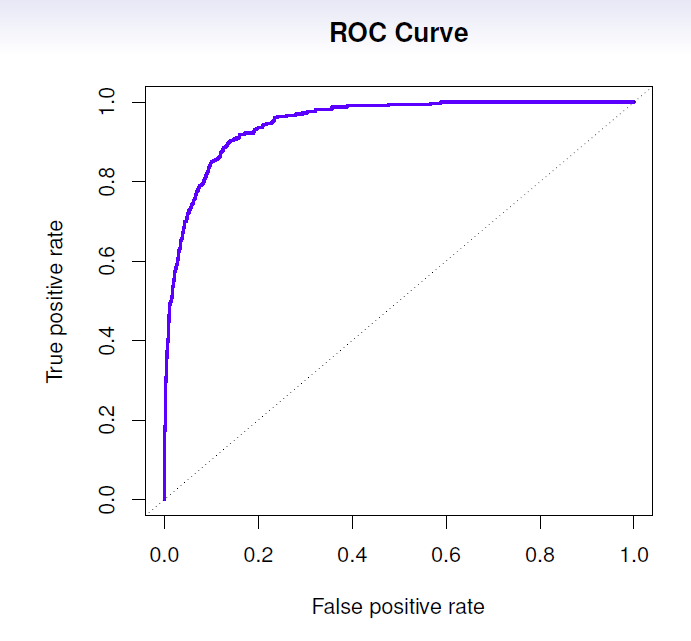

LDA 예측 결과를 분석해 보자.

In [24]:
pred_by_LDA = lda.predict(X_te)
print(pred_by_LDA)

[1 1 1 2 1 0 2 1 1 2 2 0 2 1 0 0 2 1 0 1 1 1 2 2 0 2 1 0 0 2 1 1 1 1 2 2 1
 2 0 2 2 2 2 0 1]


In [25]:
print(y_te)

[1 2 1 1 1 1 2 1 1 2 2 0 1 1 0 0 2 1 0 1 1 1 2 2 0 2 1 0 0 0 1 2 1 1 2 2 1
 2 0 1 0 2 0 0 1]


[classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

$$ F_1 = 2 \frac{precision \times recall}{precision + recall} = \frac{TP}{ TP + 0.5 (FP + FN) }$$

In [26]:
from sklearn.metrics import classification_report
class_report = classification_report(y_te, pred_by_LDA)
print(class_report)

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.89      0.80      0.84        20
           2       0.65      0.85      0.73        13

    accuracy                           0.80        45
   macro avg       0.81      0.80      0.80        45
weighted avg       0.82      0.80      0.80        45



In [27]:
# precision for 0 class
sum((y_te==0) & (pred_by_LDA==0)) / sum(pred_by_LDA==0)

0.9

In [28]:
# precision for 1 class
sum((y_te==1) & (pred_by_LDA==1)) / sum(pred_by_LDA==1)

0.8888888888888888

In [29]:
# precision for 2 class
sum((y_te==2) & (pred_by_LDA==2)) / sum(pred_by_LDA==2)

0.6470588235294118

In [30]:
# recall for 0 class
sum((y_te==0) & (pred_by_LDA==0)) / sum(y_te==0)

0.75

In [31]:
# recall for 1 class
sum((y_te==1) & (pred_by_LDA==1)) / sum(y_te==1)

0.8

In [32]:
# recall for 1 class
sum((y_te==2) & (pred_by_LDA==2)) / sum(y_te==2)

0.8461538461538461

In [33]:
# accuracy
(sum((y_te==0) & (pred_by_LDA==0)) + sum((y_te==1) & (pred_by_LDA==1)) + sum((y_te==2) & (pred_by_LDA==2))) / len(y_te)

0.8

```sklearn.metrics```의 [```accuracy_score```](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)를 이용하여 예측 정확성을 계산할 수 있다.

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(lda.predict(X_te), y_te)

0.8

다음으로도 가능하다.

In [35]:
lda.score(X_te, y_te)

0.8

## 표준화

때로는 모형을 훈련할 때, 훈련 데이터를 표준화하여 훈련하면 성능 향상을 기대할 수 있다.  

[```sklearn.preprocessing.StandardScaler```](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 이용하면 쉽게 표준화할 수 있다.  

- $X$의 값들만 표준화하면 된다.

- $X$의 훈련 데이터를 `StandardScaler`에 `fit()` 한 후, `transform()` method를 훈련 데이터와 테스트 데이터에 적용한다.

- 표준화는 **전처리 단계**의 일종으로 `sklearn`에서 전처리 클래스들은 일반적으로 `fit()` -> `transform()`의 단계로 수행된다.

  - 혹은 합쳐서 `fit_transform()` <br><br>

- 반면 모델(estimator)들은 보통 `fit()` -> `predict()`의 단계로 수행된다는 점이 다름.

In [36]:
# 표준화
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [37]:
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)
X_te_std = std_scale.transform(X_te)

In [38]:
#평균은 0이 되고, 표준편차는 1이 된다.
X_tn_std[:,0].mean(), X_tn_std[:,0].std(), X_tn_std[:,1].mean(), X_tn_std[:,1].std()

(5.80321087758954e-15, 1.0, -4.541062596963046e-16, 1.0)

모델 fitting할 때 표준화된 훈련 세트를 이용해 보자.

In [39]:
lda_std = LinearDiscriminantAnalysis()
lda_std.fit(X_tn_std, y_tn)

LinearDiscriminantAnalysis()

앞에서처럼 예측 정확성을 평가해 보자.

In [40]:
# 표준화된 테스트 세트를 이용
from sklearn.metrics import accuracy_score
accuracy_score(lda_std.predict(X_te_std), y_te)

0.8

In [41]:
lda_std.score(X_te_std, y_te)

0.8

## 다른 형태의 discriminant analysis

-------------------------------

* $f_k(x)$가 Gaussian이며 $\Sigma_{k}$가 각 클래스 별로 다를 경우, quadratic discriminant analysis라고 한다.

* $f_k(x) = \prod_{j=1}^{p} f_{jk}(x_j)$, 즉, $x$들이 조건부 독립일 때, 이를 naive Bayes라고 한다.

* 그 외에, $f_k$를 어떻게 정의하느냐에 따라 다양한 discriminant analysis form이 존재할 수 있다.

### Quadratic discriminant analysis

$$ \delta_k(x) = -\frac{1}{2} (x - \mu_k)^{\top} \Sigma_{k}^{-1} (x - \mu_k) - \frac{1}{2}\log |\Sigma_k| + \log \pi_k $$

$k$에 따라 $\Sigma_{k}$가 다르기 때문에, quadratic 형태의 라인이 경계선으로 나타난다.

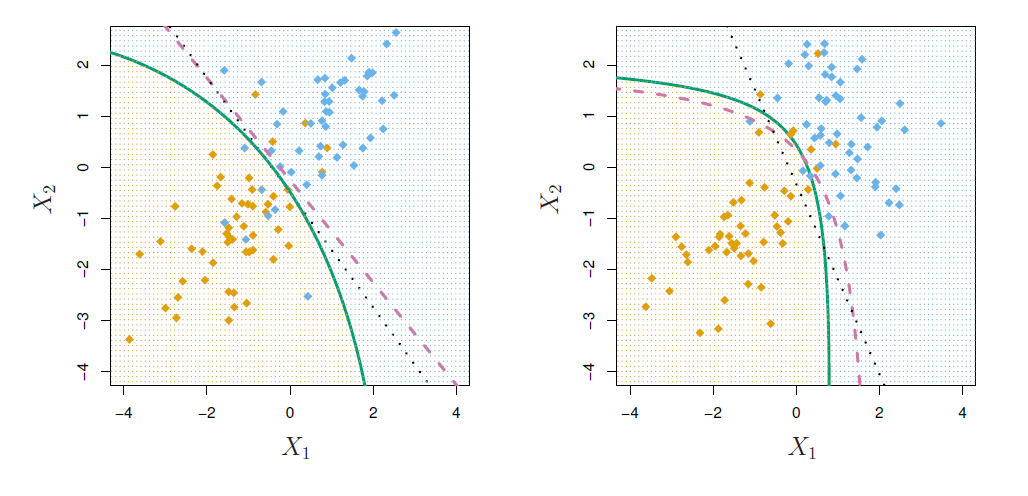

[```sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis```](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html)를 이용하여 quadratic discriminant analysis를 진행해 보자.

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_tn, y_tn)

clss = qda.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

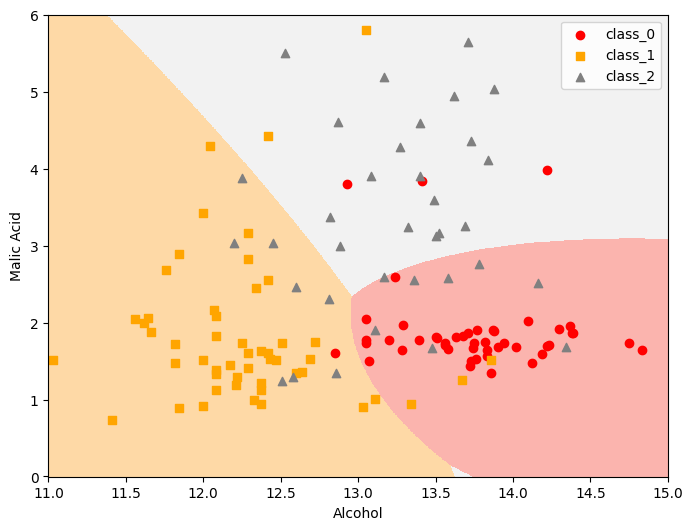

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
    
plt.legend()    
plt.show()

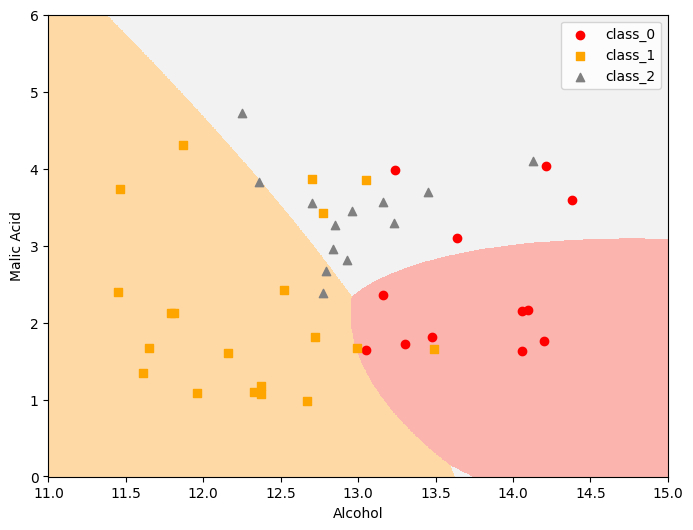

In [44]:
plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  #Create a pseudocolor plot with a non-regular rectangular grid.

df = pd.DataFrame(X_te, columns = raw_wine["feature_names"][:2])
df['target'] = y_te
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]

for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])
    
plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
    
plt.legend()    
plt.show()

In [45]:
class_report = classification_report(y_te, qda.predict(X_te))
print(class_report)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.83      0.75      0.79        20
           2       0.59      0.77      0.67        13

    accuracy                           0.73        45
   macro avg       0.74      0.73      0.73        45
weighted avg       0.75      0.73      0.74        45



In [46]:
# 각 클래스별 평균
qda.means_

array([[13.74595745,  1.88680851],
       [12.2754902 ,  1.83823529],
       [13.22742857,  3.30571429]])

In [47]:
qda.priors_

array([0.35338346, 0.38345865, 0.26315789])

추정된 covariance matrix를 보고 싶다면 `store_covariance=True`를 이용해야 한다.

In [48]:
qda = QuadraticDiscriminantAnalysis(store_covariance=True)
qda.fit(X_tn, y_tn).covariance_

[array([[ 0.21469417, -0.0363371 ],
        [-0.0363371 ,  0.3146309 ]]),
 array([[ 0.27809725, -0.01389012],
        [-0.01389012,  0.96532282]]),
 array([[0.28726672, 0.09181513],
        [0.09181513, 1.49538403]])]

### Naive Bayes

$X$들이 모두 독립이라고 가정한 경우를 Naive Bayes라고 부른다.

$p$가 클 경우 유용하다.

$\Sigma_k$는 클래스 별로 다를 수 있다고 가정한다.

Gaussian naive Bayes에서는 정규분포를 가정하며, $\Sigma_k$가 대각 행렬이 된다. 따라서

$$ \delta_k(x) \propto \log \left[ \pi_k \prod_{j=1}^{p} f_{kj}(x_j) \right] = -\frac{1}{2} \sum_{j=1}^{p} \frac{(x_j - \mu_{kj})^2}{\sigma_{kj}^2} + \log \pi_k $$

Naive Bayes 방법은 $x$가 질적 변수, 양적 변수가 섞여 있을 경우로도 확장할 수 있다.

만약 $X_j$가 질적 변수라면, $f_{kj}(x_j)$ 대신 prabability mass function을 적용한다.

Naive Bayes는 강한 조건을 가정하지만, 비교적 좋은 분류 결과를 얻는 경향이 있다고 한다.

[`sklearn.naive_bayes.GaussianNB`](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)를 이용하여 보자.

In [49]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_tn, y_tn)

GaussianNB()

In [50]:
pred_by_gnb = gnb.predict(X_te)
print(pred_by_gnb)

[1 1 1 2 1 0 2 1 1 2 2 0 2 1 2 0 2 1 0 1 1 1 2 2 0 2 1 0 0 2 1 1 0 1 2 2 1
 2 0 2 2 2 2 0 1]


In [51]:
class_report_gnb = classification_report(y_te, pred_by_gnb)
print(class_report_gnb)

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.88      0.75      0.81        20
           2       0.61      0.85      0.71        13

    accuracy                           0.76        45
   macro avg       0.76      0.75      0.75        45
weighted avg       0.78      0.76      0.76        45



In [52]:
Z = gnb.predict_proba(np.c_[xx1.ravel(), xx2.ravel()])   

clss = gnb.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)

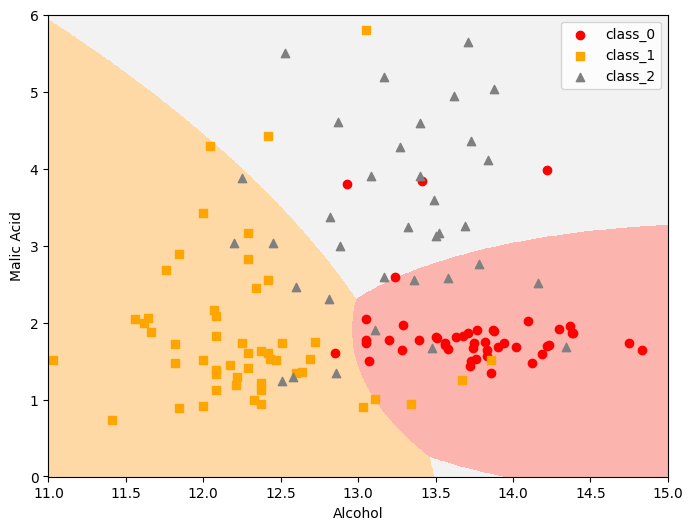

In [53]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8,6))

plt.pcolormesh(xx1, xx2, clss, cmap="Pastel1")  

df = pd.DataFrame(X_tn, columns = raw_wine["feature_names"][:2])
df['target'] = y_tn
markers = ['o', 's', '^']
colors = ["red", "orange", "grey"]


for i, mark in enumerate(markers):
    X_i = df[df['target'] == i]
    class_i = raw_wine.target_names[i]
    plt.scatter(X_i[["alcohol"]], X_i[["malic_acid"]], marker = mark, label = class_i, color = colors[i])

plt.xlabel("Alcohol")
plt.ylabel("Malic Acid")
    
plt.legend()    
plt.show()

추정치들도 체크해 볼 수 있다.

In [54]:
gnb.class_prior_

array([0.35338346, 0.38345865, 0.26315789])

In [55]:
gnb.theta_

array([[13.74595745,  1.88680851],
       [12.2754902 ,  1.83823529],
       [13.22742857,  3.30571429]])

In [56]:
gnb.var_

array([[0.21012621, 0.30793662],
       [0.27264437, 0.94639493],
       [0.2790591 , 1.45265878]])